In [1]:
%matplotlib inline
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from matplotlib import cm
from python_speech_features import mfcc

In [2]:
data_dir = '../data/speech_commands/core'
keywords = list(filter(lambda x : os.path.isdir(os.path.join(data_dir,x)),os.listdir(data_dir)))

In [3]:
def get_random_wav(keyword):
     wavs = os.listdir(os.path.join(data_dir, keyword))
     random_wav = random.choice(wavs)
     return os.path.join(data_dir, keyword, random_wav)

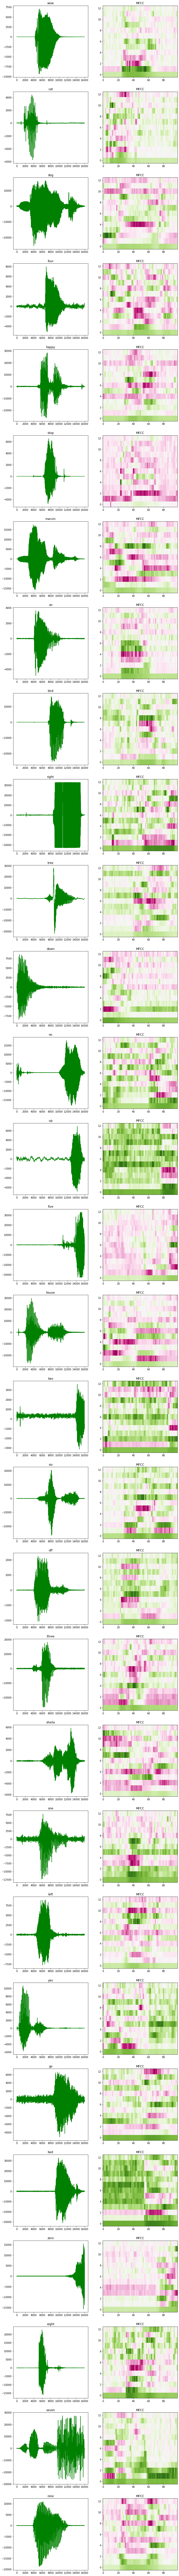

In [4]:
fig = plt.figure(figsize=(12,192))
n = len(keywords)
for i, keyword in enumerate(keywords):
    file = get_random_wav(keyword)
    rate, sig = wav.read(file)
    mfcc_feat = mfcc(sig, rate)
    mfcc_data = np.swapaxes(mfcc_feat, 0 ,1)
    
    ax1 = fig.add_subplot(n,2, 2*i + 1)
    ax1.plot(sig, color='g')
    ax1.set_title(keyword)
    
    ax2 = fig.add_subplot(n,2, 2*i + 2)
    cax = ax2.imshow(mfcc_data, interpolation='nearest', cmap=cm.PiYG, origin='lower', aspect='auto')
    ax2.set_title('MFCC')